In [64]:
# import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix







In [2]:
# read csv-file
churnData = pd.read_csv('/Users/rikesan/Documents/Data/Week 7/DATA_Customer-Churn.csv')


In [77]:
# Check the datatypes of all the columns in the data. 
churnData.info()
churnData.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  StreamingMovies   7032 non-null   object 
 12  Contract          7032 non-null   object 
 13  MonthlyCharges    7032 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7032 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
# column TotalCharges is object type, so we convert this column into numeric type
churnData.TotalCharges = pd.to_numeric(churnData.TotalCharges, errors='coerce')

<AxesSubplot:>

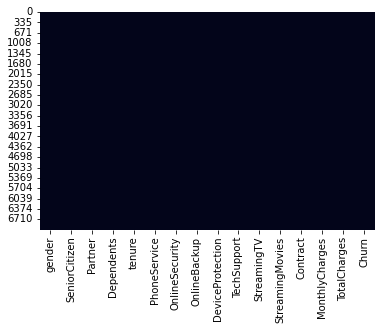

In [36]:
# visualize missing data with seaborn: white lines indicate missing values in the dataset
sns.heatmap(churnData.isnull(), cbar=False)


In [89]:
#Check for null values in the dataframe
churnData.isnull().sum()
# check for the rows with null values specifically
churnData.loc[churnData['TotalCharges'].isnull() == True]

#Replace the null values
churnData.fillna(0)

#or better yet, since it's only 0.15% of the whole dataset: drop rows with missing data
churnData.dropna(inplace = True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn


No     5163
Yes    1869
Name: Churn, dtype: int64
No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


<AxesSubplot:xlabel='Churn', ylabel='count'>

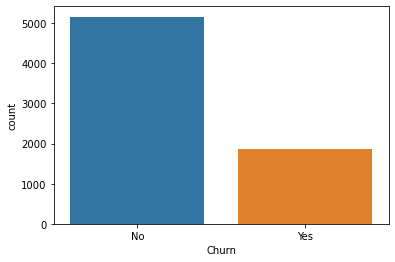

In [81]:
# investigate dependent variable:
print(churnData['Churn'].value_counts())
# percentage distribution of yes/no values
print((churnData['Churn'].value_counts())/(len(churnData['Churn']))*100)
# countplot
sns.countplot(x='Churn', data=churnData)


In [48]:
#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
print(churnData.columns) # list of the column names for copy & paste
X = pd.DataFrame(data=churnData,columns=['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges'])

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [49]:
# create dummy variable for Churn (since the two columns (yes & no) perfectly predict each other (multicollinearity), we need to drop one)
y = pd.get_dummies(churnData['Churn'], drop_first = True)


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7032 non-null   int64  
 1   SeniorCitizen   7032 non-null   int64  
 2   MonthlyCharges  7032 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 274.7 KB


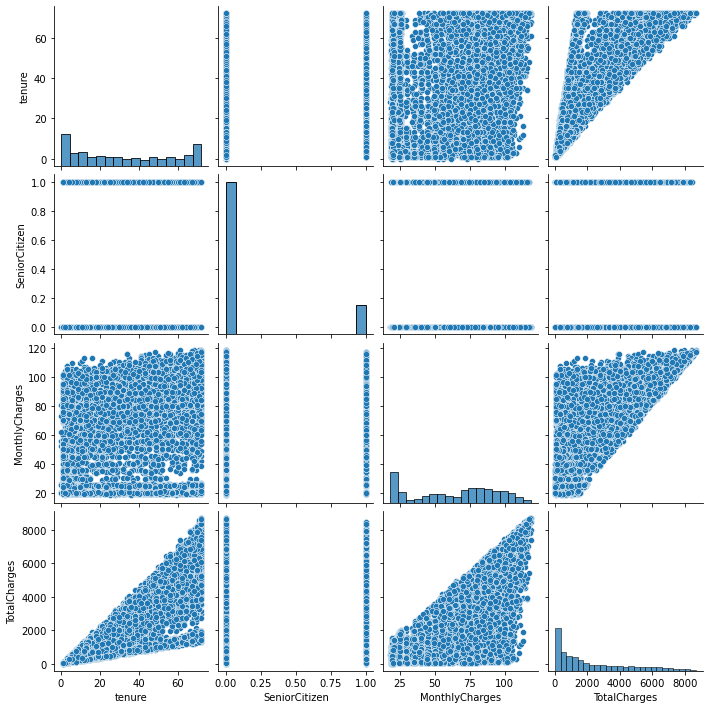

In [23]:
sns.pairplot(X)


In [52]:
#Scale the features either by using normalizer or a standard scaler.

# the scaler object (model)
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(X)

In [57]:
X.shape

(7032, 4)

In [70]:
# Split the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [76]:
#Fit a logistic Regression model on the training data
model = LogisticRegression()
# to prevent DataConversionWarning: .values gives values in an array (shape: (n,1), .ravel will convert that array shape to (n, )
model.fit(X_train, y_train.values.ravel())


LogisticRegression()

In [72]:
#Check the accuracy on the test data.
#def accuracy_check()
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))



              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.62      0.44      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407

[[935  98]
 [211 163]]


/Users/rikesan/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Error_metric,Train,Test
0,Accuracy,0.795378,0.781805
1,Precision,0.667641,0.630350
2,Recall,0.458194,0.433155


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.63      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407

Confusion matrix for the train set
[[3789  341]
 [ 810  685]]


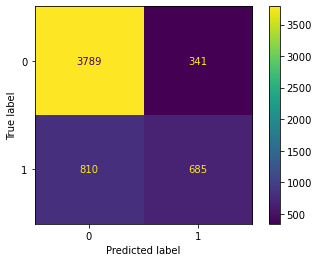

Confusion matrix for the test set
[[938  95]
 [212 162]]


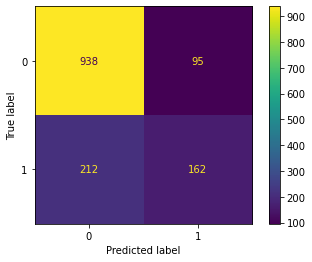

In [87]:

#Logistic regression from code along
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log = LogisticRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)


#Check the accuracy on the test data.
#def accuracy_check()
#predictions = model.predict(X_test)

print(classification_report(y_test, y_pred_test_log))


print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()



In [ ]:
Round 2

Fit a Decision Tree Classifier on the training data.
Check the accuracy on the test data.
Round 3

apply K-fold cross validation on your Decision Tree Classifier and check the model score.
fit a Random forest Classifier on the data and compare the accuracy. Note: So far we have not balanced the data.

In [90]:
# Group the tenure in bins of 12 months
print(churnData['tenure'].max())

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
churnData['tenure_group'] = pd.cut(churnData.tenure, range(1, 80, 12), right=False, labels=labels)

churnData['tenure_group'].value_counts()

#drop column customerID and tenure
churnData.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
churnData.head()


1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

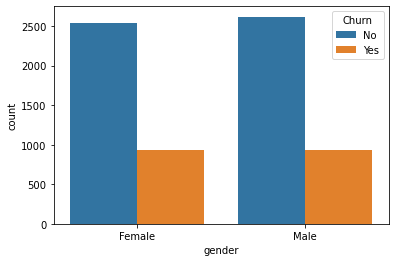

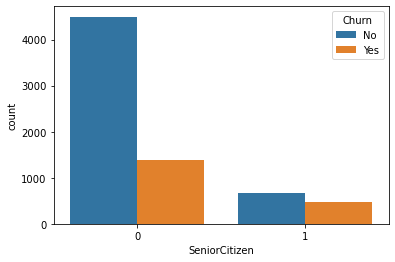

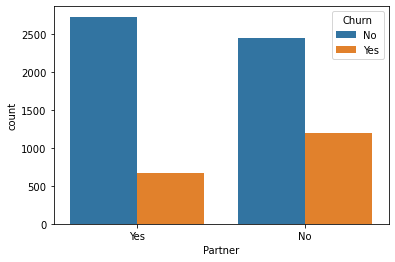

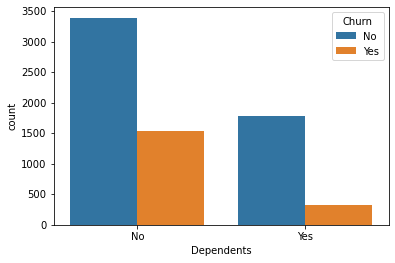

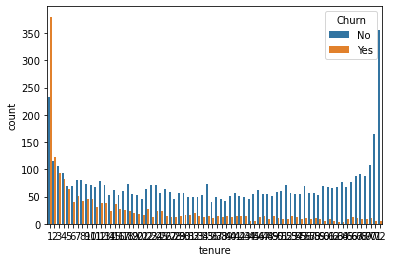

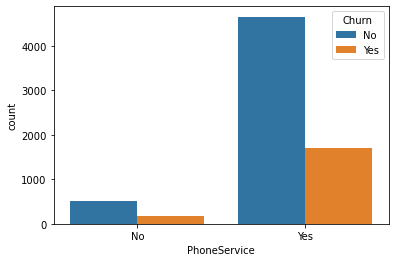

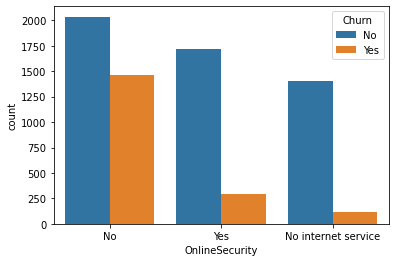

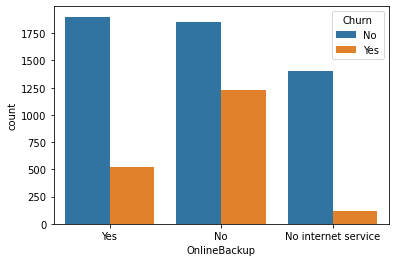

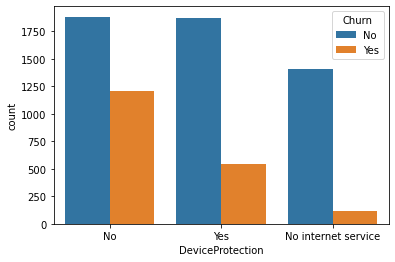

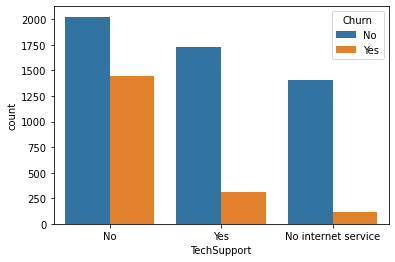

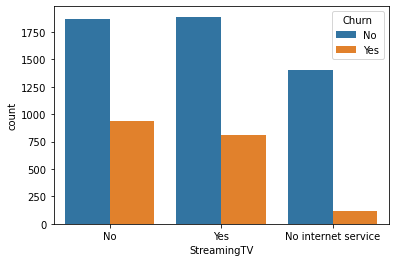

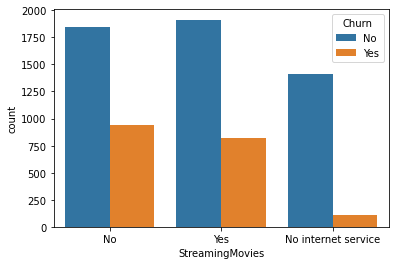

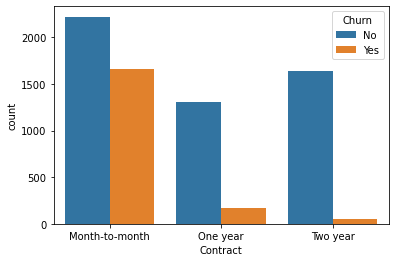

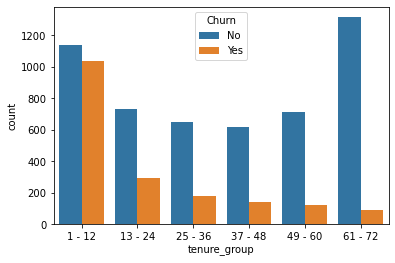

In [91]:
# Data Exploration
# Plot distibution of individual predictors by churn
# lets see Univariate Analysis
for i, predictor in enumerate(churnData.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=churnData, x=predictor, hue='Churn')